<a href="https://colab.research.google.com/github/hagigat/NeuralNetwork/blob/master/Parsoil_regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IN THE NAME OF GOD


> Sajjad Haghighat


> Parsoil Regression with Tensorflow





In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [0]:
def normalize(X):
    for i in range(X.shape[1]):
        X[:, i] = (X[:, i] - X[:, i].mean()) / np.std(X[:, i])
    return X
def Ynormalize(X):
    X = (X - X.mean()) / np.std(X)
    return X    

In [193]:
traindata = pd.read_csv('parsoil_train.csv')
traindata.dropna()
print(traindata.head(2))
y_train = Ynormalize(np.array(traindata[["CLOSE"]]))
traindata.drop('CLOSE',axis = 1, inplace = True)
x_train = normalize(np.array(traindata))

   DTYYYYMMDD  FIRST  HIGH   LOW  ...      VOL  OPENINT  OPEN  LAST
0    20190319   9077  9077  8850  ...  1168831      399  8645  9000
1    20190318   8646  8646  8474  ...  1528522      283  8235  8646

[2 rows x 10 columns]


In [194]:
testdata = pd.read_csv('parsoil_test.csv')
testdata.dropna()
print(testdata.head(2))
y_test = Ynormalize(np.array(testdata[["CLOSE"]]))
testdata.drop('CLOSE',axis = 1, inplace = True)
x_test = normalize(np.array(testdata))

   DTYYYYMMDD  FIRST   HIGH    LOW  ...     VOL  OPENINT   OPEN   LAST
0    20190806  13401  13401  12981  ...  601485      408  13496  13110
1    20190805  13881  14000  13200  ...  647648      327  13785  13548

[2 rows x 10 columns]


In [0]:
model = tf.keras.models.Sequential([
        Dense(27, input_dim=9 ,activation="sigmoid"),
        Dense(18, activation="sigmoid"),
        Dense(9, activation="sigmoid"),
        Dense(1),
])

In [0]:
model.compile(optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.2),
              loss='mean_squared_error',
              metrics=['mse'])

In [197]:
output = model.fit(x_train, y_train, epochs=50, shuffle=True)

Epoch 1/50
108/108 [==============================] - 0s 1ms/step - loss: 0.2338 - mse: 0.2338
Epoch 2/50
108/108 [==============================] - 0s 1ms/step - loss: 0.0301 - mse: 0.0301
Epoch 3/50
108/108 [==============================] - 0s 1ms/step - loss: 0.0187 - mse: 0.0187
Epoch 4/50
108/108 [==============================] - 0s 1ms/step - loss: 0.0143 - mse: 0.0143
Epoch 5/50
108/108 [==============================] - 0s 1ms/step - loss: 0.0090 - mse: 0.0090
Epoch 6/50
108/108 [==============================] - 0s 1ms/step - loss: 0.0077 - mse: 0.0077
Epoch 7/50
108/108 [==============================] - 0s 1ms/step - loss: 0.0061 - mse: 0.0061
Epoch 8/50
108/108 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036
Epoch 9/50
108/108 [==============================] - 0s 1ms/step - loss: 0.0045 - mse: 0.0045
Epoch 10/50
108/108 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027
Epoch 11/50
108/108 [============================

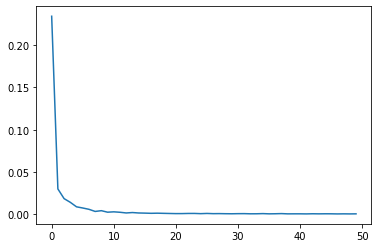

In [198]:
plt.plot(output.history['loss'])
plt.show()

In [199]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0174 - mse: 0.0174


[0.0173763670027256, 0.0173763670027256]

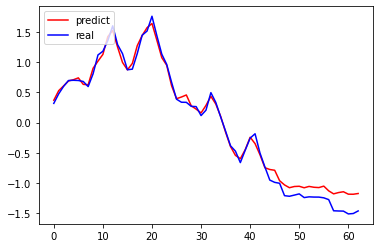

In [200]:
Y = model.predict(x_test)
plt.plot(Y , color="red" , label='predict')
plt.plot(y_test , color="blue", label='real')
plt.legend(loc="upper left")
plt.show()

In [201]:

for i in range(len(Y)):
  print("Actual :", y_test[i],"\tPredict : ", Y[i][0])
  print('___________________________________________')

Actual : [0.31837532] 	Predict :  0.36993653
___________________________________________
Actual : [0.47692357] 	Predict :  0.52965254
___________________________________________
Actual : [0.60143564] 	Predict :  0.6085317
___________________________________________
Actual : [0.69794326] 	Predict :  0.69117033
___________________________________________
Actual : [0.7018208] 	Predict :  0.71101487
___________________________________________
Actual : [0.6983741] 	Predict :  0.7418904
___________________________________________
Actual : [0.68200227] 	Predict :  0.63393015
___________________________________________
Actual : [0.59712726] 	Predict :  0.62726897
___________________________________________
Actual : [0.80866853] 	Predict :  0.90076655
___________________________________________
Actual : [1.12231832] 	Predict :  1.0197126
___________________________________________
Actual : [1.18349726] 	Predict :  1.1314068
___________________________________________
Actual : [1.35970985] 	Pred